# Esercitazione 12

## Esercizio 1

Utilizzo due ottimizzatori diversi da sgd: Adam e Adagrad. 

Importo le librerie necessarie e inizializzo il generatore di numeri casuali.

In [80]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

seed=278
np.random.seed(seed) 
tf.random.set_seed(seed)

Importo il dataset e divido i dati in training e test.

In [81]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 6


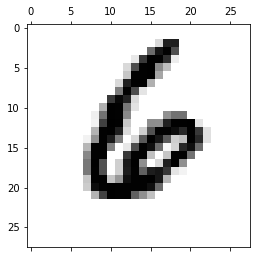

an example of a data point with label 6 before to_categorical ...
... and with label [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [82]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[13])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[13,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[13], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[13], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

Scrivo una funzione con la quale creare la rete neurale. Riduco progressivamente il numero di neuroni e vario la funzione di attivazione, scegliendo softmax per l'ultimo layer.

In [83]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


# Ottimizzazione con Adam

Eseguo una ottimizzazione utilizzando Adam, anzichè una semplice SGD. utilizzo la _cross entropy_ come loss function, adatta ai problemi di classificazione. Come metrica utilizzo l'accuratezza della predizione, ovvero quante volte risulta corretta.

In [84]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model_Adam():
    model=create_DNN()
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


Avendo osservato che 5 epoche risultano insufficienti per avere una precisione soddisfacente, e che si è ancora lontani dalla situazione di overfitting, decido di procedere con 20 epoche.

In [85]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model_Adam()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train, batch_size=batch_size,
          epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4855 - accuracy: 0.8529 - val_loss: 0.1130 - val_accuracy: 0.9657
Epoch 2/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1256 - accuracy: 0.9636 - val_loss: 0.0850 - val_accuracy: 0.9739
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0904 - accuracy: 0.9740 - val_loss: 0.0738 - val_accuracy: 0.9783
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0701 - accuracy: 0.9796 - val_loss: 0.0650 - val_accuracy: 0.9814
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0521 - accuracy: 0.9840 - val_loss: 0.0828 - val_accuracy: 0.9757
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0749 - val_accuracy: 0.9817
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0384 - accuracy: 0.9882 - val_loss: 0.0725 - val_ac

313/313 [==============================] - 1s 3ms/step - loss: 0.1419 - accuracy: 0.9806


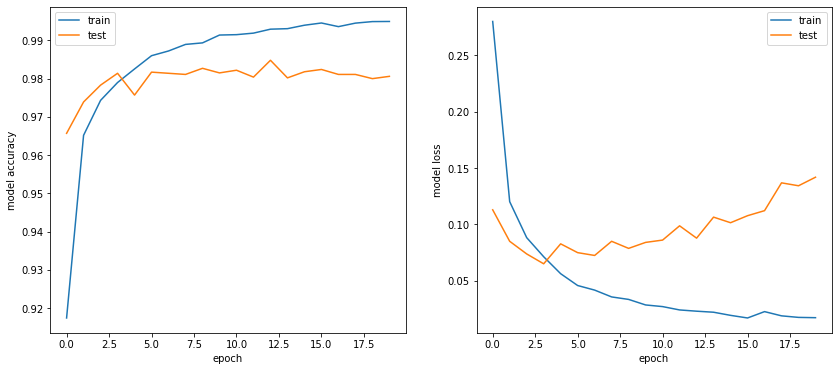

In [89]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

fig = plt.figure(figsize=[14,6])

# summarize history for accuracy
ax1 = fig.add_subplot(121)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_ylabel('model accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')

# summarize history for loss
ax2 = fig.add_subplot(122)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_ylabel('model loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='best')

Da questo grafico posso osservare che, come è normale che sia, l'errore sul set di test risulta più alto rispetto a quello di training. Si inizi a notare un graduale aumento della loss già dalla quinta epoca, segno che il modello diventa persino troppo complesso e si rischia l'overfitting.

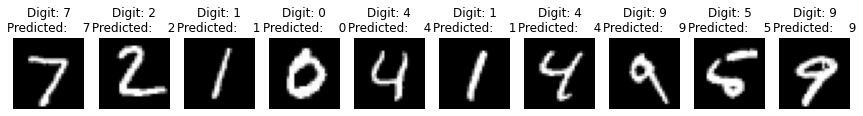

In [90]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Valutando il modello su questi pochi singoli numeri, osservo che la performance è buona: c'è un solo errore su 10 predizioni, che peraltro avrebbe forse commesso persino un umano.

# Ottimizzazione con Adagrad

Eseguo ora una ottimizzazione utilizzando Adagrad. Definisco una nuova funzione _compile_model_Adagrad_ e procedo come fatto con Adam.

In [91]:
def compile_model_Adagrad():
    model=create_DNN()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(), metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [92]:
batch_size = 32
epochs = 20

model_DNN = compile_model_Adagrad()

X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

history = model_DNN.fit(X_train, Y_train, batch_size=batch_size,
          epochs=epochs,verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 1.7239 - accuracy: 0.4577 - val_loss: 0.6212 - val_accuracy: 0.8587
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7558 - accuracy: 0.7821 - val_loss: 0.4408 - val_accuracy: 0.8915
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5822 - accuracy: 0.8328 - val_loss: 0.3740 - val_accuracy: 0.9042
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5122 - accuracy: 0.8514 - val_loss: 0.3403 - val_accuracy: 0.9101
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4642 - accuracy: 0.8698 - val_loss: 0.3159 - val_accuracy: 0.9158
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4435 - accuracy: 0.8734 - val_loss: 0.2988 - val_accuracy: 0.9201
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4158 - accuracy: 0.8819 - val_loss: 0.2846 - val_ac

313/313 [==============================] - 1s 3ms/step - loss: 0.2056 - accuracy: 0.9420


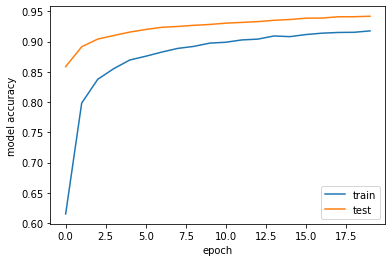

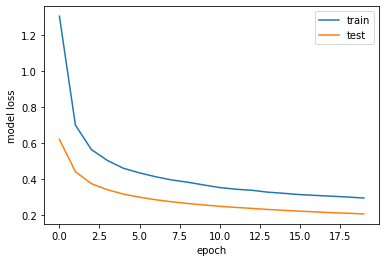

In [93]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

fig = plt.figure(figsize=[14,6])

# summarize history for accuracy
ax1 = fig.add_subplot(121)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_ylabel('model accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')

# summarize history for loss
ax2 = fig.add_subplot(122)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_ylabel('model loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='best')

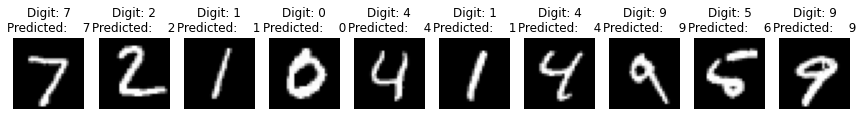

In [94]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Viene commesso lo stesso errore del caso precedente, che di nuovo reputo accettabile.

## Esercizio 2: CNN

Ora vario l'architettura della rete, costruendone una convoluzionale. Inizio ripetendo quando fatto nell'esercizio 11.1.

In [100]:
from keras.layers import Flatten, Conv2D, MaxPooling2D

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 784)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

X_test shape: (10000, 28, 28, 1)
Y_test shape: (10000, 10)

60000 train samples
10000 test samples


Aggiungo vari strati alla rete convoluzionale: eseguo dei _pooling_, _Flatten_ e concludo con un _Dropout_ prima di ottenere il risultato finale tramite una _softmax_, che è la miglior scelta per la funzione di attivazione finale in un problema di classificazione di questo tipo.

In [101]:
def create_CNN():
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5),activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, kernel_size=(5, 5),activation='elu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(80, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,optimizer='SGD',metrics=['accuracy'])
    return model

Ora, alleno e testo la rete.

In [110]:
# training parameters
batch_size = 32
epochs = 20
model_CNN = create_CNN()
model_CNN.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Final test loss:', score[0])
print('Final test accuracy:', score[1])

Epoch 1/20
1875/1875 [==============================] - 29s 15ms/step - loss: 1.1599 - accuracy: 0.6169 - val_loss: 0.1478 - val_accuracy: 0.9550
Epoch 2/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2377 - accuracy: 0.9312 - val_loss: 0.0912 - val_accuracy: 0.9709
Epoch 3/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1616 - accuracy: 0.9530 - val_loss: 0.0751 - val_accuracy: 0.9760
Epoch 4/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1299 - accuracy: 0.9636 - val_loss: 0.0632 - val_accuracy: 0.9784
Epoch 5/20
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1122 - accuracy: 0.9673 - val_loss: 0.0569 - val_accuracy: 0.9805
Epoch 6/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1010 - accuracy: 0.9715 - val_loss: 0.0530 - val_accuracy: 0.9834
Epoch 7/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0875 - accuracy: 0.9746 - val_loss: 0.0500 -

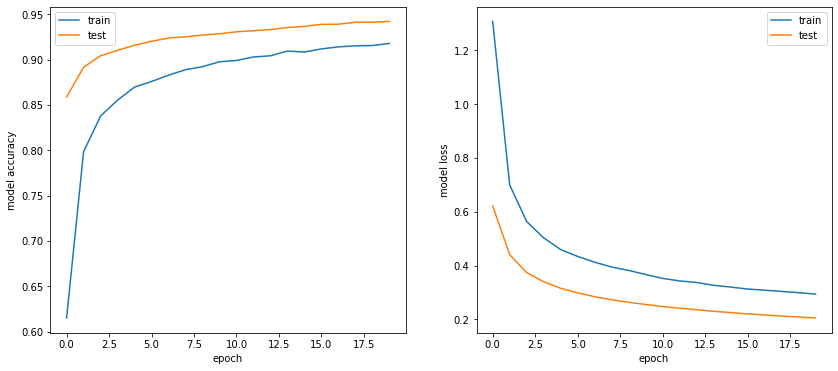

In [111]:
fig = plt.figure(figsize=[14,6])

# summarize history for accuracy
ax1 = fig.add_subplot(121)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_ylabel('model accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')

# summarize history for loss
ax2 = fig.add_subplot(122)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_ylabel('model loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='best')

## Esercizio 3
Ora utilizzo dei numeri da me disegnati con gimp per vedere se la predizione della mia rete allenata risulta corretta.

Image size: 28x28 pixels
(28, 28)


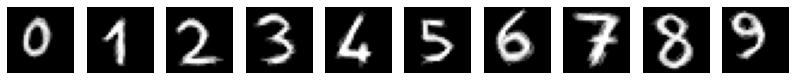

In [112]:
from PIL import Image
fig = plt.figure(figsize=[14,6])
data = []

for num in range (10):
    data.append(np.array(np.zeros((28,28))))
                
for num in range (10):
    digit_filename = "./es12/num"+str(num)+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();

    for j in range(ydim):
        for i in range(xdim):
            data[num][i,j]=pix[j,i]

    data[num] /= 255

    axs = fig.add_subplot(1,10, num+1)    
    axs.imshow(data[num], cmap='gray')
    axs.axis('off')

print("Image size: "+str(xdim)+"x"+str(ydim)+" pixels")
print(data[1].shape)## Esercizio 3

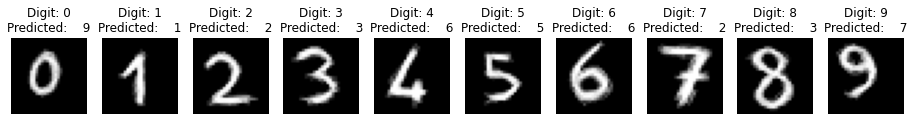

In [113]:
fig = plt.figure(figsize=[16,6])

for num in range(10):
    this_data = data[num].reshape(1,xdim*ydim)
    pred_0 = model_DNN.predict(this_data)
    plot_data = this_data.reshape(xdim,ydim)

    axs = fig.add_subplot(1,10, num+1)    
    axs.imshow(plot_data, cmap='gray')    
    axs.set_title("Digit: {}\nPredicted:    {}".format(num, np.argmax(pred_0)))    
    axs.axis('off') 
    del (this_data)

Purtroppo con i numeri scritti da me la rete non funziona a dovere, presentando un'accuratezza del 50%. Mi sento però di dare la colpa più alla mia pessima scrittura che alla rete neurale. 